# Importing Libraries

In [ ]:
# Imports Libraries
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [ ]:
# Initialises data
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])

# Data that you are predicting for
xPrediction = np.array([2025, 2028])

# Codes the data to be in a more manageable range
minXData = np.min(xData)
xData -= minXData
xPrediction -= minXData



---


# Linear

In [ ]:
# Defines the linear function
def linear(xData, m, c):
  return m * xData + c

MODEL_TYPE = linear

# Polynomial

In [ ]:
# Defines the polynomial function
def polynomial(xData, a, b, c):
  return a * xData ** 2 + b * xData + c

MODEL_TYPE = polynomial

# Exponential

In [ ]:
# Defines the exponential function
def exponential(xData, a, b):
  return a * b ** xData

MODEL_TYPE = exponential

# Logistic

In [ ]:
# Used to produce function with set L value
def logisticDecorator(L):

  # Defines the logistic function
  def logistic(xData, k, x0):
    return L / (1 + np.exp(-k * (xData - x0)))
  return logistic

L = 10000
# Forms a range of models with percentage changes in carrying capacity
modelsType = [logisticDecorator(L * (1 + a / 100)) for a in range(-20, 25, 10)]



---


# General

In [ ]:
# Used to produce function to predict based on the calculated parameters
def modelDecorator(regressorFunc, popt):
  def model(xData):
    return regressorFunc(xData, *popt)
  return model

models = []
predictions = []
rSquaredScores = []

# Creates model for each of the different inital model presets
for model in modelsType:

  # Calculates the paramaters of the model
  popt, pcov = curve_fit(model, xData, yData,
                        bounds=([0, -np.inf], [np.inf, np.inf]))

  models.append(modelDecorator(model, popt))

  # Uses the model to perform a prediction
  predictions.append(models[-1](xPrediction))

  # Calculates the r^2 score
  rSquaredScores.append(r2_score(yData, models[-1](xData)))

print(f'R^2 values: {rSquaredScores}')
print(f'Average R^2 value: {np.mean(rSquaredScores)}')

R^2 values: [0.9851897810411744, 0.9866670643889994, 0.98770221995156, 0.988461329616386, 0.989038212775574]
Average R^2 value: 0.9874117215547388


# Plotting Data

In [ ]:
# Initialises constants
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"
LINE_LABELS = ["Line Label 1", "Line Label 2", "Line Label 3", "Line Label 4", "Line Label 5"]
LOWER_X, UPPER_X = 0, 50

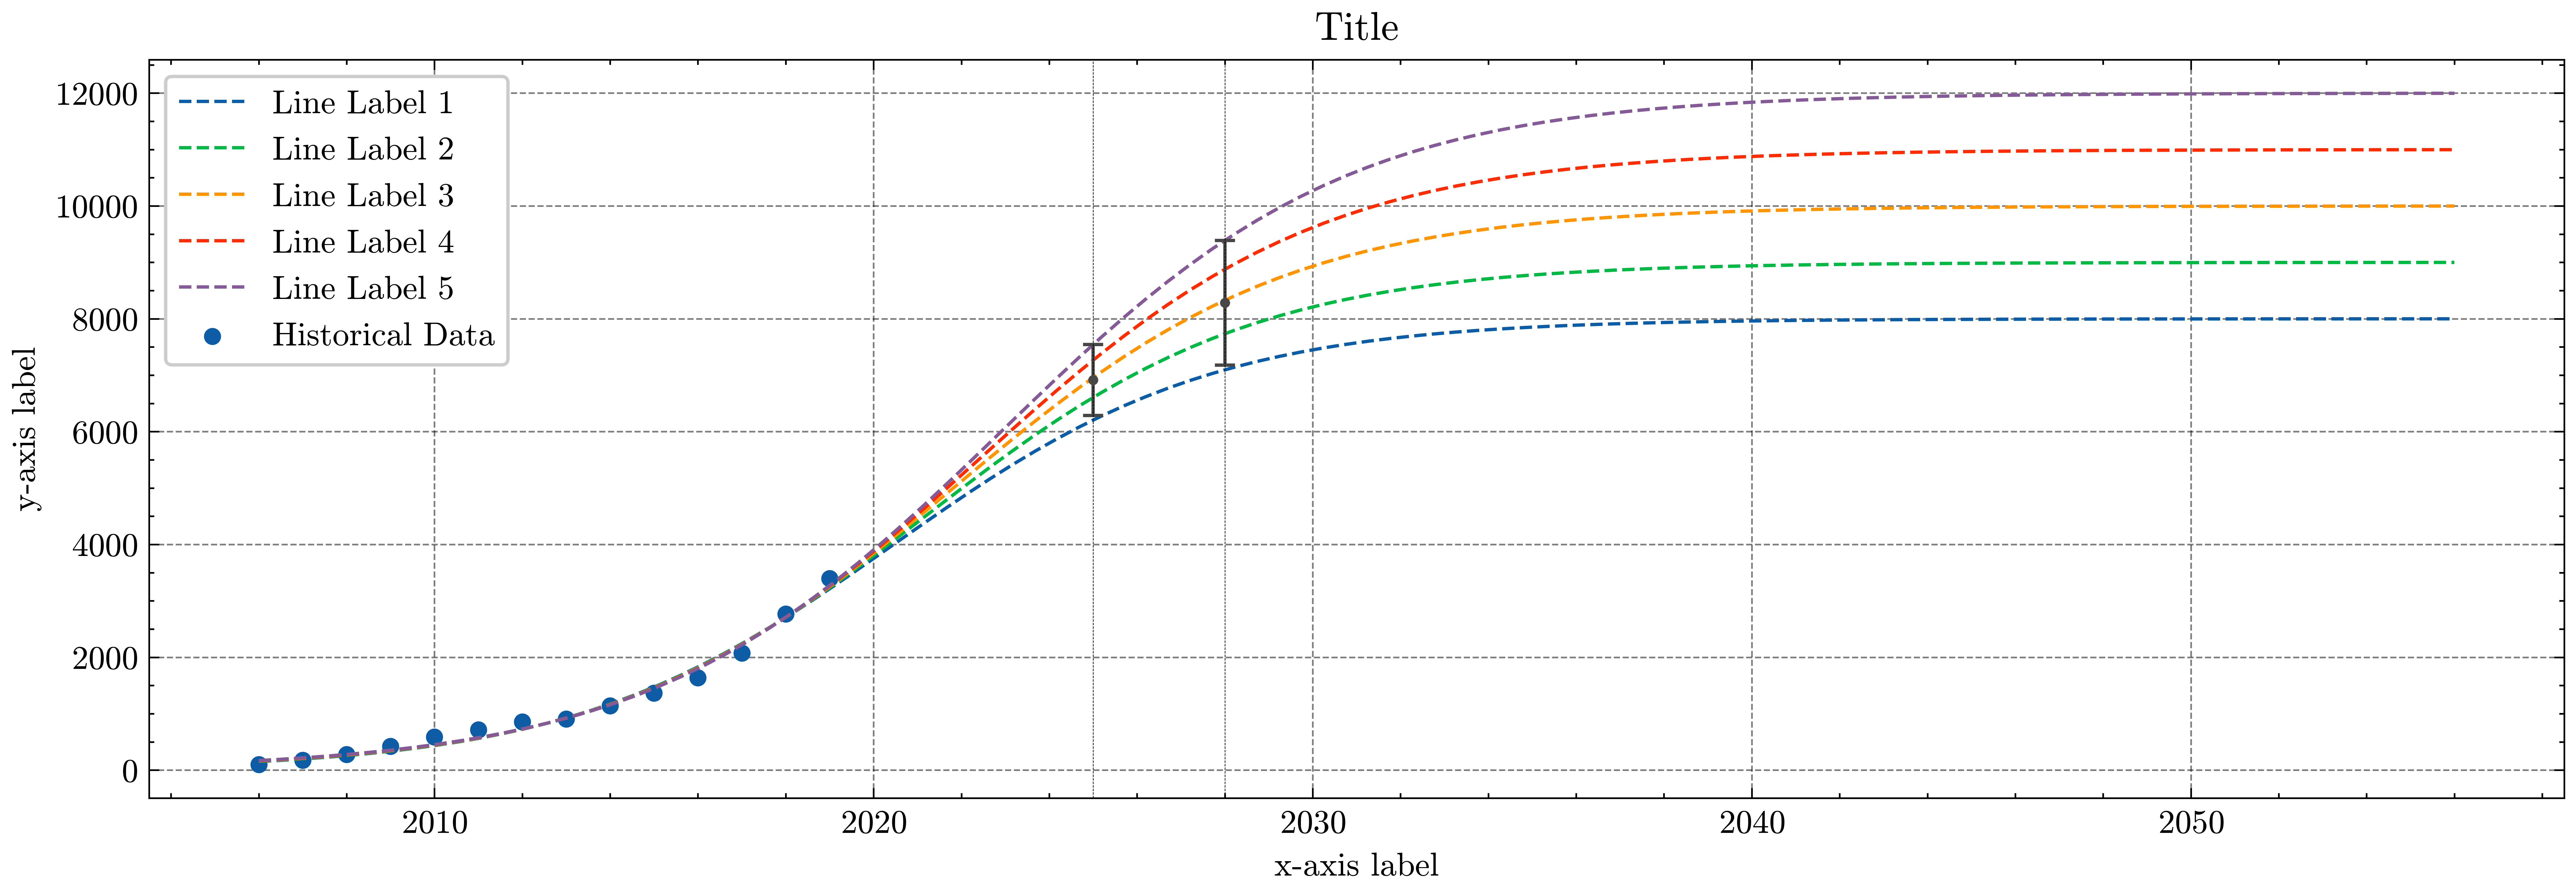

In [ ]:
# Initialises settings of the graph
plt.figure(figsize=(13,4), dpi=1000)

plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots each of the regression lines
for i, model in enumerate(models):
  xPlot = np.linspace(LOWER_X, UPPER_X, 100)
  plt.plot(xPlot + minXData, model(xPlot), linestyle='dashed', label=LINE_LABELS[i])

# Plots the data and prediction points
plt.scatter(xData + minXData, yData, marker="o", s=17, label="Historical Data")

# Plots the error bars for the predictions
plt.errorbar(xPrediction + minXData, np.mean(predictions, axis=0),
             yerr = np.abs(np.mean(predictions, axis=0) - np.max(predictions, axis=0)),
             fmt ='o', ms=2, capsize=3)

for xCoord in xPrediction + minXData:
    plt.axvline(x=xCoord, color='black', linestyle='dashed', linewidth=0.2)

plt.legend()
plt.show()


# Sensitivity Analysis

In [ ]:
# Applies Gaussian noise to data
def applyNoise(data):
  return data + np.random.normal(0, 0.1 * np.std(data), len(data))

In [ ]:
diff = np.zeros(len(xPrediction))

# Creates 20 models with random noise applied
# Calculates the average percentage difference for each of the predictions
for _ in range(20):
  popt, pcov = curve_fit(MODEL_TYPE, xData, applyNoise(yData),
                       bounds=([0, -np.inf], [np.inf, np.inf]))
  model = modelDecorator(MODEL_TYPE, popt)

  prediction = model(xPrediction)
  diff += np.abs(yPrediction - prediction)

sensitivity = (diff / 20) / yPrediction
print(f'Percentage changes for {xPrediction} are {sensitivity}')

Percentage changes for [19 22] are [0.04336181 0.05719616]
